In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 

In [8]:
# Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31') 
values = np.arange(len(dates))*.2 + np.random.rand(len(dates))*50
ts = pd.Series (values, index=dates)

In [10]:
print(ts.head())

2022-01-01    27.440675
2022-01-02    35.959468
2022-01-03    30.538169
2022-01-04    27.844159
2022-01-05    21.982740
Freq: D, dtype: float64


In [11]:
print(ts.tail())

2022-12-27     81.356545
2022-12-28    117.399198
2022-12-29     99.590298
2022-12-30     95.445571
2022-12-31    116.902071
Freq: D, dtype: float64


In [12]:
print(ts.describe())

count    365.000000
mean      60.982243
std       25.052248
min        4.210920
25%       42.825287
50%       60.262714
75%       78.081380
max      119.620286
dtype: float64


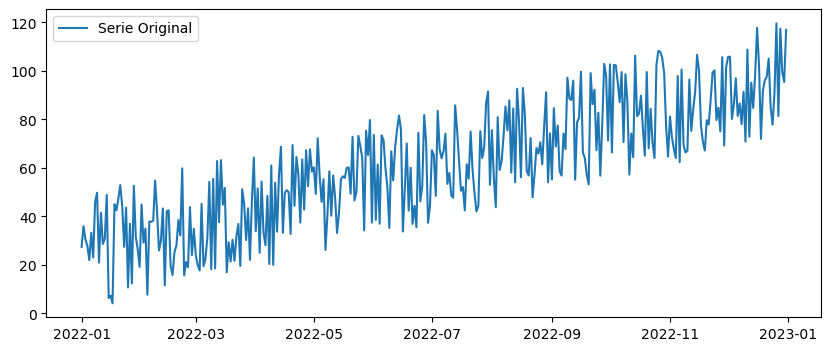

In [14]:
# Gráfica de la serie original
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Serie Original')
plt.legend() 
plt.show()

In [16]:
# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(ts, model='additive') 

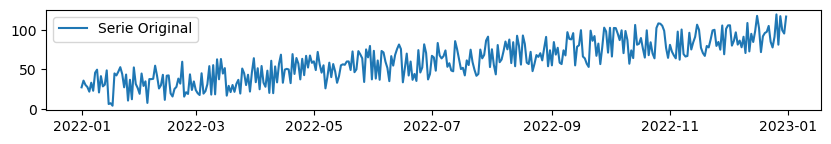

In [17]:
#Gráfica de la serie original
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(ts, label='Serie Original')
plt.legend()

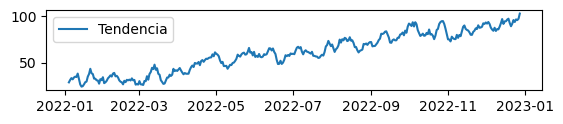

In [18]:
# Gráfica de la tendencia
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()

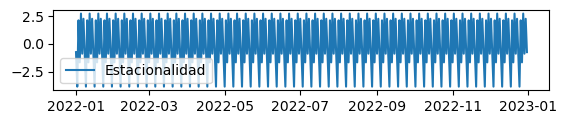

In [19]:
# Gráfica de la estacionalidad
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()

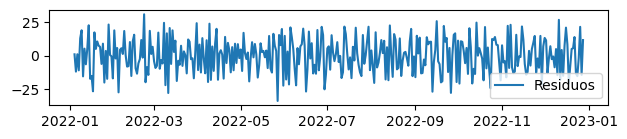

In [20]:
# Gráfica de los residuos
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()
plt.tight_layout()
plt.show()

## con dataset de KAGGLE
#### https://www.kaggle.com/datasets/atulanandjha/temperature-readings-iot-devices
####  Contexto
#### Conjunto de datos relacionales de dispositivos IOT para registrar lecturas de temperatura.
IIoT 4.0 está llegando a cubrir todo el sistema de monitoreo y mantenimiento empresarial. Por lo tanto, necesitamos algoritmos y enfoques audaces y sostenibles para analice los datos del sensor IOT y encuentra patrones ocultos e ideas. Índice de Calor ( temperatura + humedad ) es un dato común registrado en estos lectores de IOT. La frecuencia de los próximos datos es muy rápida. El sensor lee cientos a millones de datos por segundo. Hay una aplicación enorme y versátil de estos datos en el mundo real, como: agricultura, pronóstico del tiempo, monitoreo y tratamiento del suelo, mantenimiento empresarial, centros de datos y muchos más…

In [3]:
# Cargar el archivo CSV
file_path = 'IOT-temp.csv'  # Asegúrate de usar la ruta correcta del archivo
df = pd.read_csv(file_path)

In [4]:
# Mostrar las primeras filas para entender la estructura del DataFrame
print(df.head())

                                    id  room_id/id        noted_date  temp  \
0  __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30    29   
1  __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30    29   
2  __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29    41   
3  __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29    41   
4  __export__.temp_log_196126_d30b72fb  Room Admin  08-12-2018 09:29    31   

  out/in  
0     In  
1     In  
2    Out  
3    Out  
4     In  


In [6]:
# Intentar convertir la columna de fecha con el formato especificado
try:
    df['noted_date'] = pd.to_datetime(df['noted_date'], format='%d-%m-%Y %H:%M')  # Ajusta el formato si es necesario
except ValueError:
    print("No se pudo convertir con el formato especificado, intentando inferir automáticamente.")
    df['noted_date'] = pd.to_datetime(df['noted_date'], errors='coerce')  # Coerce convertirá los valores no válidos en NaT

# Verificar si hay fechas no convertidas
print(df['noted_date'].isna().sum(), "fechas no convertidas.")

0 fechas no convertidas.


In [7]:
# Configurar la columna de noted_date como índice
df.set_index('noted_date', inplace=True)

# Extraer la serie temporal (ajusta el nombre de la columna si es necesario)
ts = df['temp']  # Cambia 'temperature' por el nombre correcto de la columna de datos


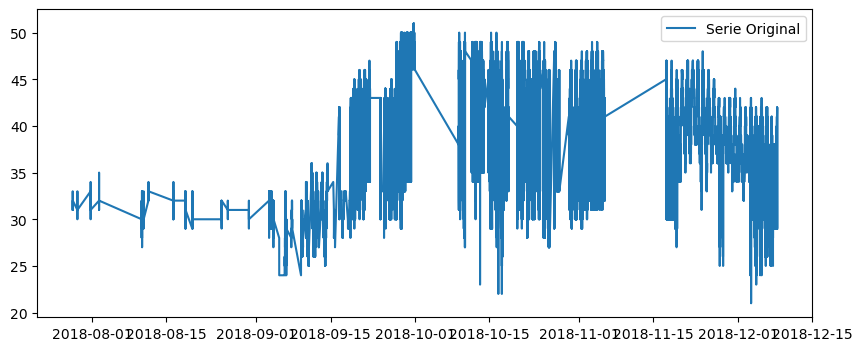

In [8]:
# Gráfica de la serie original
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Serie Original')
plt.legend()
plt.show()

In [19]:
# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(ts, model='additive', period=10)  # 365Ajusta el periodo según sea necesario


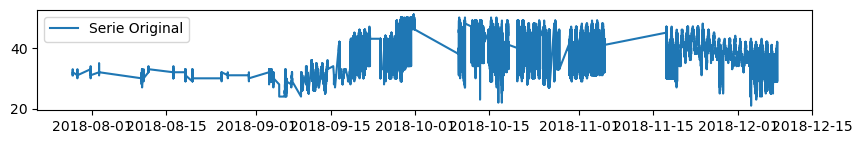

In [20]:
# Gráfica de la serie original, tendencia, estacionalidad y residuos
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(ts, label='Serie Original')
plt.legend()

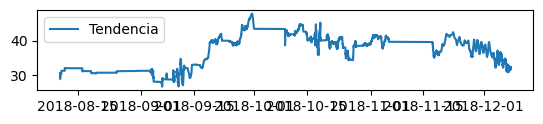

In [11]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()

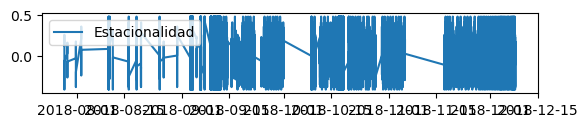

In [12]:
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()

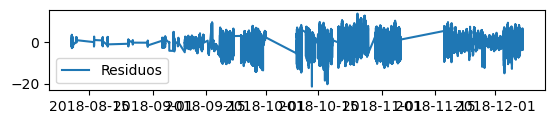

In [13]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>